In [2]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter
import numpy as np

In [3]:
def compute_mean_std_table(data: pd.DataFrame, column: str) -> pd.DataFrame:
    return round(
        data.groupby(column)
        .agg(
            {
                "Min Fidelity": ["mean", "std"],
            }
        )
        .rename_axis(column),
        4,
    )


def compute_f_statistic_p_value(
    data: pd.DataFrame, column: str
) -> pd.DataFrame:
    grouped_data = data.groupby(column)

    group_values = [group["Min Fidelity"].values for _, group in grouped_data]

    f_statistic, p_value = f_oneway(*group_values)

    return round(f_statistic, 4), round(p_value, 4)

In [4]:
excel_file_name = './new_hyperparameter_tuning_results_de.csv'

In [5]:
data = pd.read_csv(excel_file_name)
data = data.round(4)

In [6]:
data.sort_values(by="Min Fidelity", inplace=True, ascending=False)
data.head(3)

,Sequence Length,Population Size,Num Generations,Crossover Rate,Differential Weight,Min Fidelity,I,X,Y,Z,H,R_X_PI/4
51,32,20,25,1.0,0.5,0.9995,0.9996,0.9995,0.9996,0.9997,0.9996,0.9997
48,32,20,25,0.8,0.5,0.9993,0.9993,0.9996,0.9994,0.9996,0.9996,0.9996
45,32,20,25,0.6,0.5,0.9991,0.9994,0.9991,0.9996,0.9994,0.9995,0.9994


In [7]:
mean_min_fidelity = round(data["Min Fidelity"].mean(), 4)
std_min_fidelity = round(data["Min Fidelity"].std(), 4)
print(f"Mean min fidelity: {mean_min_fidelity} +- {std_min_fidelity}")

Mean min fidelity: 0.4113 +- 0.3969


In [8]:
hyperparameters = [
    "Sequence Length",
    "Crossover Rate",
    "Differential Weight",
]


for hp in hyperparameters:
    display(compute_mean_std_table(data, hp))
    f_statistic, p_value = compute_f_statistic_p_value(data, hp)
    print(f"F-statistic: {f_statistic}, P-value: {p_value}")

Min Fidelity        
                        mean     std
Sequence Length                     
1                     0.0001  0.0000
2                     0.0005  0.0000
4                     0.0047  0.0043
8                     0.0319  0.0315
16                    0.6720  0.0207
32                    0.9977  0.0017
64                    0.9843  0.0034
128                   0.7938  0.0120
256                   0.3596  0.0123
512                   0.2689  0.0081

F-statistic: 8568.942, P-value: 0.0


Min Fidelity        
                       mean     std
Crossover Rate                     
0.6                  0.4111  0.3999
0.8                  0.4111  0.4003
1.0                  0.4119  0.4042

F-statistic: 0.0, P-value: 1.0


Min Fidelity        
                            mean     std
Differential Weight                     
0.5                       0.4153  0.3982
1.0                       0.4102  0.4029
2.0                       0.4085  0.4033

F-statistic: 0.0023, P-value: 0.9977


In [9]:
for sequence_length in [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]:
    reduced_data = data[data["Sequence Length"] == sequence_length]
    highest_min_fidelity = reduced_data["Min Fidelity"].max()
    print(
        f"Sequence Length: {sequence_length}, Highest Min Fidelity: {highest_min_fidelity}"
    )

Sequence Length: 1, Highest Min Fidelity: 0.0001
Sequence Length: 2, Highest Min Fidelity: 0.0006
Sequence Length: 4, Highest Min Fidelity: 0.0112
Sequence Length: 8, Highest Min Fidelity: 0.0891
Sequence Length: 16, Highest Min Fidelity: 0.7056
Sequence Length: 32, Highest Min Fidelity: 0.9995
Sequence Length: 64, Highest Min Fidelity: 0.988
Sequence Length: 128, Highest Min Fidelity: 0.8045
Sequence Length: 256, Highest Min Fidelity: 0.3824
Sequence Length: 512, Highest Min Fidelity: 0.2775


In [10]:
use_pdf = False
use_png = not use_pdf
if use_pdf:
    mpl.use("pdf")
file_extension = "pdf" if use_pdf else "png"

In [11]:
report_path= "/home/chriswise/github/Honours-Research-ML-for-QC/Report/sections/grad_free_results/figures/"
windows_path = "/mnt/c/Users/ChrisWiseLocal/OneDrive/Documents/Uni/UNSW/2023/Honours Research/Seminars/report_photos/"

In [12]:
path_to_save = report_path if use_pdf else windows_path

In [13]:
width = 3.487
height = width / 1.618
alpha_value = 0.75
title_font_size = 9
plt.rc("font", family="serif", serif="cm10")
plt.rc("text", usetex=True)
plt.rc("axes", labelsize=title_font_size - 2)

In [14]:
mean_min_fidelity = data.groupby("Sequence Length")["Min Fidelity"].mean()

In [15]:
print(sorted(data["Sequence Length"].unique()))

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]


In [16]:
default_blue = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

In [23]:
excel_file_name = './qubit_control_minimum_fidelity_results.xlsx'

qubit_control_data = pd.read_excel(excel_file_name)

In [25]:
display(qubit_control_data['Random'])

0    0.0001
1    0.0006
2    0.0022
3    0.0089
4    0.0320
5    0.0747
6    0.1347
7    0.1583
8    0.2429
9    0.2475
Name: Random, dtype: float64

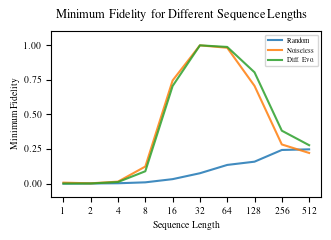

In [31]:
width = 3.487
height = width / 1.618
alpha_value = 0.85
title_font_size = 9

fig, ax = plt.subplots(figsize=(width, height))

plt.rc("font", family="serif", serif="Times")
plt.rc("text", usetex=True)
plt.rc("axes", labelsize=title_font_size - 2)

plt.suptitle(
    "Minimum Fidelity for Different Sequence Lengths",
    fontsize=title_font_size,
)

control_pulse_types = ["Random", 'Noiseless', 'Diff. Evo.']

sequence_lengths = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

for index, pulse_type in enumerate(control_pulse_types):
    filtered_data = qubit_control_data[pulse_type ]

    colour = plt.rcParams["axes.prop_cycle"].by_key()["color"][index]

    ax.plot(
        sequence_lengths,
        filtered_data,
        color=colour,
        alpha=alpha_value,
        label=f"{pulse_type}",
    )

ax.set_xscale("log", base=2)
ax.legend(fontsize=title_font_size - 4)

plt.xticks(sequence_lengths, fontsize=title_font_size - 2)
plt.yticks(fontsize=title_font_size - 2)

plt.xlabel("Sequence Length", fontsize=title_font_size - 2)
plt.ylabel(
    "Minimum Fidelity", fontsize=title_font_size - 2
)
plt.ylim(-0.1, 1.1)

formatter = ScalarFormatter()
formatter.set_scientific(False)
ax.xaxis.set_major_formatter(formatter)


# fig.tight_layout()
plt.savefig(
    path_to_save + f"qubit_control_min_fidelity.{file_extension}",
    dpi=500,
    # bbox_inches="tight",
)